# Overfitting plot

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from scipy.interpolate import make_interp_spline

import vis_utils
from custom_colors import blue_shades
colors = [blue_shades[i] for i in [1, 2, 4]]

# font_path = r'C:\Users\Felix\AppData\Local\Microsoft\Windows\Fonts\SourceSansPro-Regular.ttf'
font_path = r"C:\Users\felix.krause\AppData\Local\Microsoft\Windows\Fonts\SourceSansPro-Regular.otf"  # work laptop
fm.fontManager.addfont(font_path)
source_sans_pro = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = source_sans_pro.get_name()

In [8]:
plt.style.use('default')

In [21]:
# STORE = False
STORE = True

In [22]:
num_gen = iter(range(23))

In [23]:
colors = {
    "underfitting": "#E69F00",
    "balanced": "#56B4E9",
    "overfitting": "#D55E00",
    "training_error": "#0072B2",
    "generalization_error": "#009E73"
}

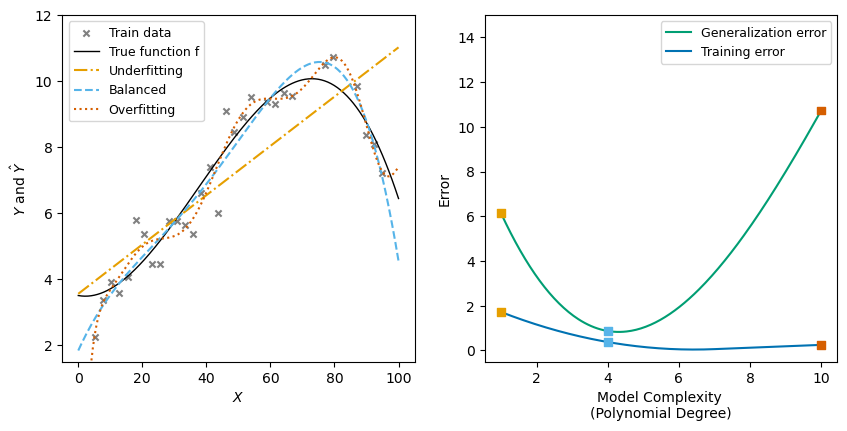

In [29]:
# Data points
# seed = next(num_gen)
# print(seed)
np.random.seed(9)
X = np.linspace(0, 100, 40)

f = lambda x: 3.5 - 0.00003725 * x ** 3 + 0.0042 * x ** 2 - 0.0181 * x

# Random 30 samples for train
X_train = np.random.choice(X, 30, replace=False)
Y_train = f(X_train) + np.random.normal(0, 0.6, len(X_train))

# Remaining samples for test
X_test = np.array([x for x in X if x not in X_train])
Y_test = f(X_test) + np.random.normal(0, 0.6, len(X_test))

flexibility = [1, 4, 10]

# Polynomial fitting and MSE calculation
mse_train = []
mse_test = []
polynomial_fits = []

x_range = np.linspace(0, 100, 200)

for degree in flexibility:
    # Fit polynomial model of degree `degree`
    model = np.poly1d(np.polyfit(X_train, Y_train, degree))
    polynomial_fits.append(model(x_range))
    
    # Compute MSE for training and testing sets
    train_error = np.mean((model(X_train) - Y_train) ** 2)
    test_error = np.mean((model(X_test) - Y_test) ** 2)
    mse_train.append(train_error)
    mse_test.append(test_error)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# Left: Under-, balanced-, and overfitting curves
axs[0].scatter(X_train, Y_train, color="grey", label="Train data", s=20, marker="x")
axs[0].plot(x_range, f(x_range), color="black", label="True function f", lw=1)
axs[0].plot(x_range, polynomial_fits[0], label=f"Underfitting", lw=1.5, color=colors["underfitting"], ls="dashdot")
axs[0].plot(x_range, polynomial_fits[1], label=f"Balanced", lw=1.5, color=colors["balanced"], ls="--")
axs[0].plot(x_range, polynomial_fits[2], label=f"Overfitting", lw=1.5, color=colors["overfitting"], ls="dotted")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$Y$ and $\hat{Y}$")
# give more space on y-axis
axs[0].set_ylim(1.5, 12)
axs[0].legend(fontsize=9)
# axs[0].set_title("Under-, Balanced-, and Overfitting")

# Right: MSE vs. flexibility
x_smooth = np.linspace(min(flexibility), max(flexibility), 200)

# Create smooth curves using interpolation
train_spline = make_interp_spline(flexibility + [100], mse_train + [0], k=2)
test_spline = make_interp_spline([0] + flexibility, [10.2] + mse_test, k=3)
mse_train_smooth = train_spline(x_smooth)
mse_test_smooth = test_spline(x_smooth)

dots_colors = [colors["underfitting"], colors["balanced"], colors["overfitting"]]

axs[1].plot(x_smooth, mse_test_smooth, color=colors["generalization_error"], label="Generalization error", lw=1.5)
axs[1].plot(x_smooth, mse_train_smooth, color=colors["training_error"], label="Training error", lw=1.5)
axs[1].scatter(flexibility, mse_train, color=dots_colors, s=30, marker="s", zorder=10)
axs[1].scatter(flexibility, mse_test, color=dots_colors, s=30, marker="s", zorder=10)
axs[1].set_xlabel("Model Complexity \n(Polynomial Degree)")
axs[1].set_ylabel("Error")
axs[1].set_ylim(-0.5, 15)
axs[1].legend(fontsize=9)
# axs[1].set_title("Training vs. Testing Error")

# plt.tight_layout()

if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + "/under-overfitting.pdf", format="pdf", bbox_inches="tight")
    
plt.show()
# 0, 9, 25
# 28, 29, 30 (36), 39
# 2